# Homework

## Problem 1

3


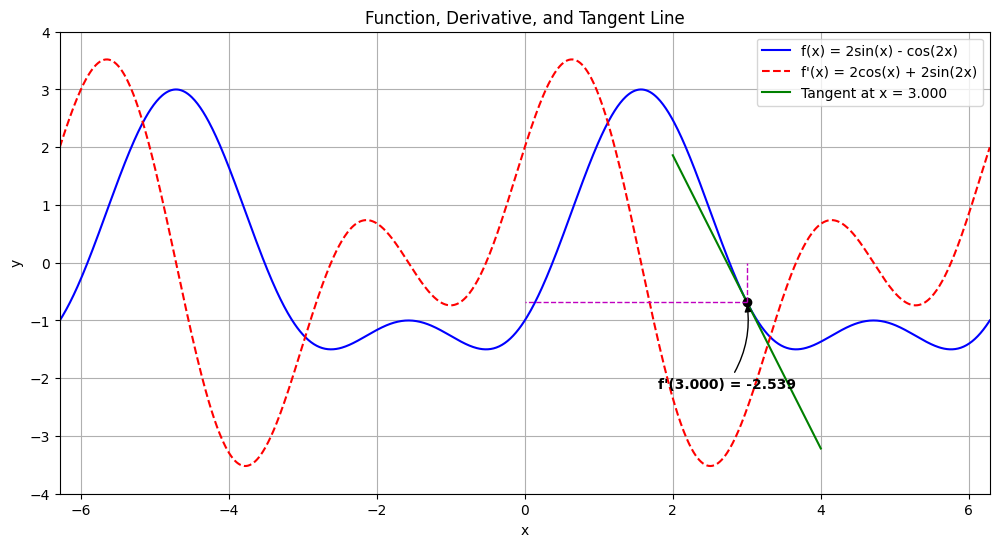

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def beauty_derivative_plot(x):
    x_grid = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

    f = lambda t: 2 * np.sin(t) - np.cos(2 * t)
    df = lambda t: 2 * np.cos(t) + 2 * np.sin(2 * t)

    y0 = f(x)
    slope = df(x)

    x_line = np.linspace(x - 1, x + 1, 200)
    y_line = y0 + slope * (x_line - x)

    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.xlim(-2 * np.pi, 2 * np.pi)
    plt.ylim(-4, 4)

    plt.plot(x_grid, f(x_grid), "b-", label="f(x) = 2sin(x) - cos(2x)")
    plt.plot(x_grid, df(x_grid), "r--", label="f'(x) = 2cos(x) + 2sin(2x)")
    plt.plot(x_line, y_line, "g-", label=f"Tangent at x = {x:.3f}")
    plt.plot(x, y0, "ko")

    plt.plot([x, x], [y0, 0], "m--", linewidth=1)
    plt.plot([x, 0], [y0, y0], "m--", linewidth=1)

    plt.annotate(
        f"f'({x:.3f}) = {slope:.3f}",
        xy=(x, y0),
        xytext=(x - 1.2, y0 - 1.5),
        fontweight="bold",
        arrowprops=dict(arrowstyle="-|>", color="black", lw=1, connectionstyle="arc3,rad=0.2"),
    )

    plt.legend(loc="upper right")
    plt.title("Function, Derivative, and Tangent Line")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


point = float(input().strip())

if -2 * np.pi <= point <= 2 * np.pi:
    beauty_derivative_plot(point)
else:
    print("Error!")

## Problem 2

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import gdown

gdown.download("https://drive.google.com/uc?id=15WG5kwiq72NdaFpTlmWv0BTpM3ywwJGD", "populations.txt", quiet = False)

data = np.loadtxt("populations.txt")

year = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

Downloading...
From: https://drive.google.com/uc?id=15WG5kwiq72NdaFpTlmWv0BTpM3ywwJGD
To: /content/populations.txt
100%|██████████| 532/532 [00:00<00:00, 1.22MB/s]


- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

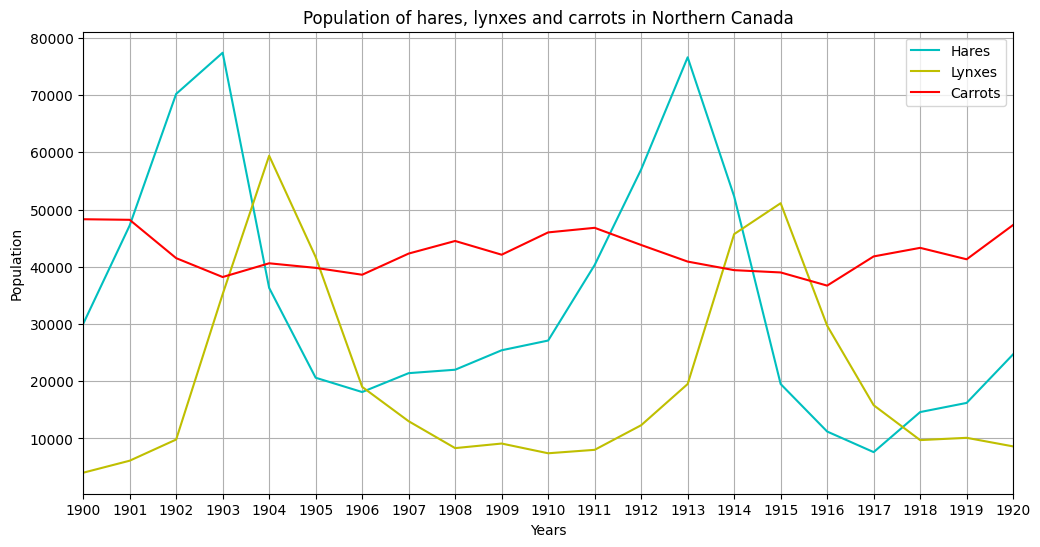

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(year, hares, "c-", label = "Hares")
plt.plot(year, lynxes, "y-", label = "Lynxes")
plt.plot(year, carrots, "r-", label = "Carrots")

plt.xticks(year)
plt.xlim(1900, 1920)
plt.grid(True)

plt.title("Population of hares, lynxes and carrots in Northern Canada")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

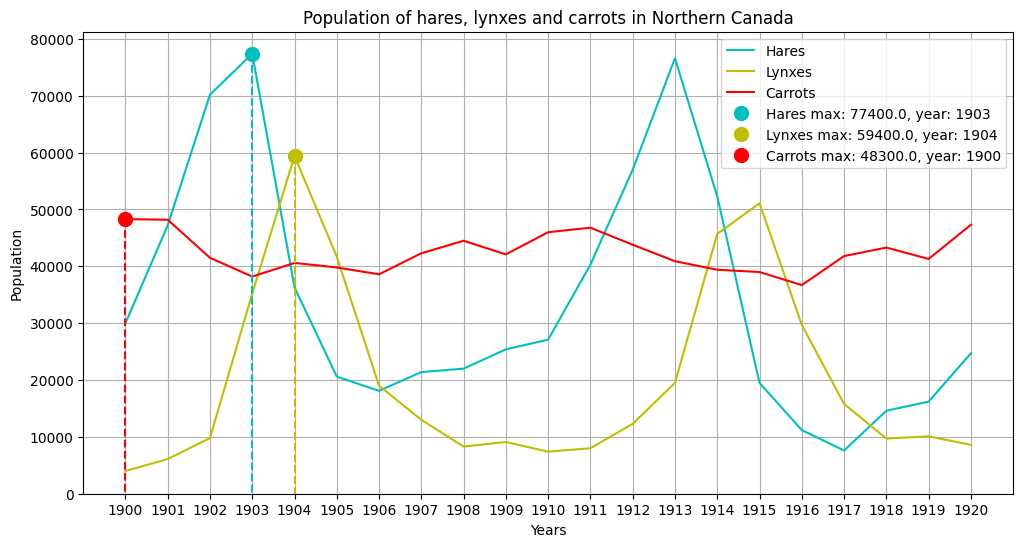

In [36]:
max_hares_index = np.argmax(hares)
max_lynxes_index = np.argmax(lynxes)
max_carrots_index = np.argmax(carrots)

max_hares_year = year[max_hares_index]
max_lynxes_year = year[max_lynxes_index]
max_carrots_year = year[max_carrots_index]

max_hares = hares[max_hares_index]
max_lynxes = lynxes[max_lynxes_index]
max_carrots = carrots[max_carrots_index]

plt.figure(figsize=(12, 6))
plt.plot(year, hares, "c-", label = "Hares")
plt.plot(year, lynxes, "y-", label = "Lynxes")
plt.plot(year, carrots, "r-", label = "Carrots")
plt.plot(max_hares_year, max_hares, "co", markersize = 10,
         label = f"Hares max: {max_hares}, year: {int(max_hares_year)}")
plt.plot(max_lynxes_year, max_lynxes, "yo", markersize = 10,
         label = f"Lynxes max: {max_lynxes}, year: {int(max_lynxes_year)}")
plt.plot(max_carrots_year, max_carrots, "ro", markersize = 10,
         label = f"Carrots max: {max_carrots}, year: {int(max_carrots_year)}")
plt.plot([max_hares_year, max_hares_year, ], [max_hares, 0], "c--")
plt.plot([max_lynxes_year, max_lynxes_year], [max_lynxes, 0], "y--")
plt.plot([max_carrots_year, max_carrots_year], [max_carrots, 0], "r--")

plt.xticks(year)
plt.ylim(0, )
plt.grid(True)
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population of hares, lynxes and carrots in Northern Canada")
plt.legend()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

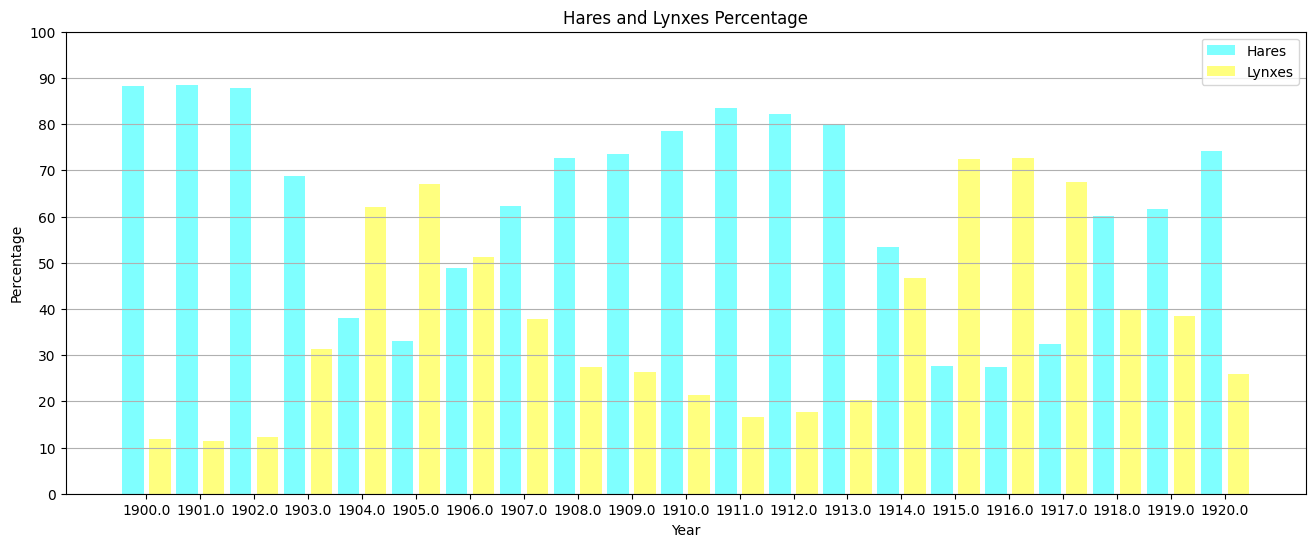

In [41]:
hares_percent = (hares / (hares + lynxes)) * 100
lynxes_percent = (lynxes / (hares + lynxes)) * 100

plt.figure(figsize=(16, 6))
x = np.arange(len(year))
plt.bar(x - 0.25, hares_percent, 0.4, label = "Hares", color = "cyan", alpha = 0.5)
plt.bar(x + 0.25, lynxes_percent, 0.4, label = "Lynxes", color = "yellow", alpha = 0.5)

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Hares and Lynxes Percentage")
plt.xticks(x, year)
plt.yticks(range(0, 101, 10))
plt.legend()
plt.grid(True, axis = "y")

plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

Std:  {'Hares': 20897.906458089667, 'Lynxes': 16254.591536908763, 'Carrots': 3322.5062255844787}
Mean: {'Hares': 34080.95238095238, 'Lynxes': 20166.666666666668, 'Carrots': 42400.0}


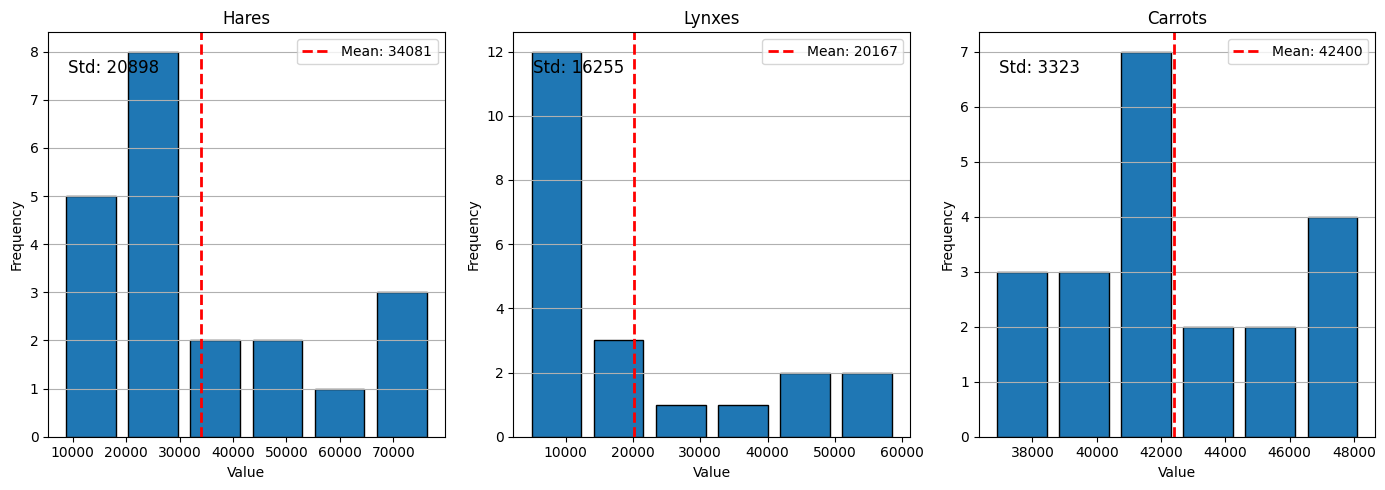

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Hares": hares,
    "Lynxes": lynxes,
    "Carrots": carrots
}

means = {name: float(np.mean(arr)) for name, arr in data.items()}
stds  = {name: float(np.std(arr))  for name, arr in data.items()}
print(f"Std:  {stds}")
print(f"Mean: {means}")

fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=False)

for ax, (name, arr) in zip(axes, data.items()):
    m = means[name]
    s = stds[name]

    ax.hist(arr, bins="auto", edgecolor="black", rwidth=0.8)
    ax.axvline(m, color="red", linestyle="--", linewidth=2, label=f"Mean: {m:.0f}")

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin + 0.05*(xmax - xmin), ymax * 0.9, f"Std: {s:.0f}", fontsize=12)

    ax.set_title(name)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.grid(True, axis="y")
    ax.legend()

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

[np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('L'), np.str_('L'), np.str_('L'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('L'), np.str_('L'), np.str_('L'), np.str_('H'), np.str_('H'), np.str_('H')]


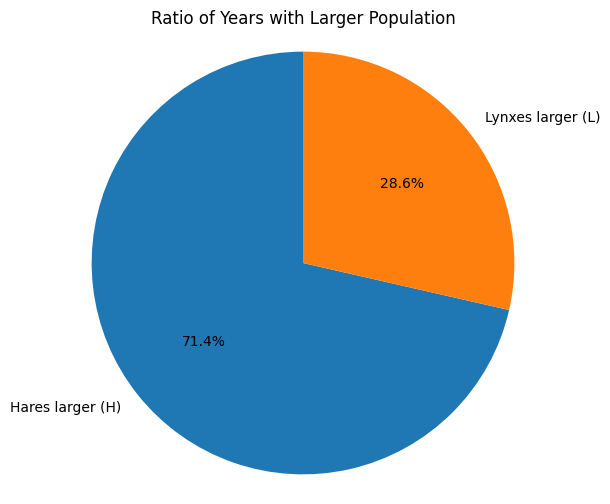

In [48]:
result = np.where(hares > lynxes, "H", "L")
print(list(result))
unique, counts = np.unique(result, return_counts=True)
count_dict = dict(zip(unique, counts))

h_count = count_dict.get("H", 0)
l_count = count_dict.get("L", 0)

plt.figure(figsize=(6, 6))
plt.pie(
    [h_count, l_count],
    labels=["Hares larger (H)", "Lynxes larger (L)"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Ratio of Years with Larger Population")
plt.axis("equal")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

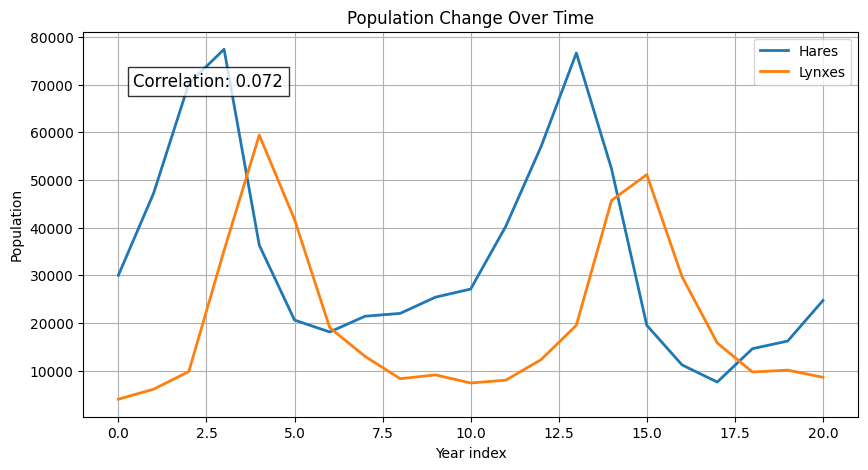

In [51]:
years = np.arange(len(hares))
corr_coef = np.corrcoef(hares, lynxes)[0, 1]

plt.figure(figsize=(10, 5))
plt.plot(years, hares, label="Hares", linewidth=2)
plt.plot(years, lynxes, label="Lynxes", linewidth=2)

plt.xlabel("Year index")
plt.ylabel("Population")
plt.title("Population Change Over Time")

plt.text(
    0.02 * len(years),
    max(max(hares), max(lynxes)) * 0.9,
    f"Correlation: {corr_coef:.3f}",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.8)
)

plt.legend()
plt.grid(True)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

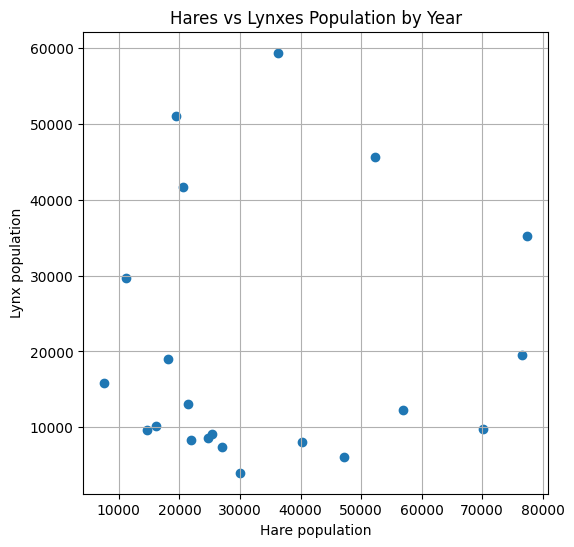

In [52]:
plt.figure(figsize=(6, 6))

plt.scatter(hares, lynxes)

plt.xlabel("Hare population")
plt.ylabel("Lynx population")
plt.title("Hares vs Lynxes Population by Year")

plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [53]:
from sklearn.linear_model import LinearRegression

years = np.arange(1900, 1921)
idx_1920 = np.where(years == 1920)[0][0]

true_value = hares[idx_1920]

X = years.reshape(-1, 1)
y = hares.copy()

X_train = np.delete(X, idx_1920, axis=0)
y_train = np.delete(y, idx_1920)

model = LinearRegression()
model.fit(X_train, y_train)

estimated_value = model.predict(X[idx_1920].reshape(1, -1))[0]

error_ratio = abs(estimated_value - true_value) / true_value

print("True value:", true_value)
print("Estimated value:", estimated_value)
print("Relative error:", error_ratio)

True value: 24700.0
Estimated value: 19775.78947368404
Relative error: 0.19936075005327777
